<a href="https://colab.research.google.com/github/777ARM777/Algorithms-and-Data-Structures/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd

# Creating dataset

In [98]:
def get_job(jobs):
    data = {
        'title': [],
        'company': [],
        'deadline': [],
        'location': []
    }

    for job in jobs[1:-1]:
        job = job.split(',')

        if len(job) == 4:
            data['title'].append(job[0])
        else:
            data['title'].append(''.join(job[:-3]))

        if job[-3].startswith('"') and job[-3].endswith('"') or job[-3].startswith("'") and job[-3].endswith("'"):
            job[-3] = job[-3][1:-1]
        data['company'].append(job[-3])
        data['deadline'].append(job[-2])
        data['location'].append(job[-1])

    return data

In [99]:
with open('staff_am_data.csv', encoding='UTF8') as data:
    jobs = data.read()
    jobs = jobs.split('\n')
    data = get_job(jobs)

df = pd.DataFrame(data)
df

,title,company,deadline,location
0,Seller/Consultant,Արմ Դիստ ՍՊԸ,09 May 2024,Yerevan
1,Orran Vanadzor Operations Coordinator,Orran benevolent NGO,09 May 2024,Vanadzor
2,Product and Customer Journey Expert,Ameriabank CJSC,21 April 2024,Yerevan
3,Project Manager,Abramyan Marketing Group (AMG),09 May 2024,Las Vegas ...
4,"""Graphic Designer Animator Video Editor""",Abramyan Marketing Group (AMG),09 May 2024,Las Vegas ...
...,...,...,...,...
1293,HR Manager,EXPOCORE HOTEL,10 April 2024,Yerevan
1294,Receptionist,EXPOCORE HOTEL,10 April 2024,Yerevan
1295,Assistant to Project Manager,Daniam LLC,09 April 2024,Yerevan
1296,Թվային պրոդուկտների վերլուծաբան,"""""Telecom Armenia"""" OJSC",09 April 2024,Yerevan


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cleaning data

In [101]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1298 non-null   object
 1   company   1298 non-null   object
 2   deadline  1298 non-null   object
 3   location  1298 non-null   object
dtypes: object(4)
memory usage: 40.7+ KB


In [102]:
df.drop_duplicates()
df

,title,company,deadline,location
0,Seller/Consultant,Արմ Դիստ ՍՊԸ,09 May 2024,Yerevan
1,Orran Vanadzor Operations Coordinator,Orran benevolent NGO,09 May 2024,Vanadzor
2,Product and Customer Journey Expert,Ameriabank CJSC,21 April 2024,Yerevan
3,Project Manager,Abramyan Marketing Group (AMG),09 May 2024,Las Vegas ...
4,"""Graphic Designer Animator Video Editor""",Abramyan Marketing Group (AMG),09 May 2024,Las Vegas ...
...,...,...,...,...
1293,HR Manager,EXPOCORE HOTEL,10 April 2024,Yerevan
1294,Receptionist,EXPOCORE HOTEL,10 April 2024,Yerevan
1295,Assistant to Project Manager,Daniam LLC,09 April 2024,Yerevan
1296,Թվային պրոդուկտների վերլուծաբան,"""""Telecom Armenia"""" OJSC",09 April 2024,Yerevan


# Cleaning anomalies

In [103]:
df.isnull().sum()

title       0
company     0
deadline    0
location    0
dtype: int64

In [104]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1298 non-null   object
 1   company   1298 non-null   object
 2   deadline  1298 non-null   object
 3   location  1298 non-null   object
dtypes: object(4)
memory usage: 40.7+ KB


In [105]:
def change_data_format(data):
    month_dict = {
        "January": '01',
        "February": '02',
        "March": '03',
        "April": '04',
        "May": '05',
        "June": '06',
        "July": '07',
        "August": '08',
        "September": '09',
        "October": '10',
        "November": '11',
        "December": '12'
    }

    data = data.split(' ')
    data[1] = month_dict[data[1]]
    data = '-'.join(data[::-1])
    return data


df['deadline'] = df['deadline'].apply(change_data_format)
df['title'] = df['title'].apply(lambda x :'Հաշվապահ' if x == 'Accountant' else x)
df['location'] = df['location'].apply(lambda x :'Yerevan' if x == 'Yerevan (Remote)' else x)
df['title'] = df['title'].apply(lambda x : x.title())

# Statistics

In [106]:
df.describe()

,title,company,deadline,location
count,1298,1298,1298,1298
unique,1078,478,31,45
top,Հաշվապահ,SoftConstruct,2024-04-14,Yerevan
freq,33,60,84,1139


In [107]:
grouped_body = df.groupby('title').size().sort_values(ascending=False).reset_index(name='count')

df_body = grouped_body[["title", "count"]]
df_body.head(10)

,title,count
0,Հաշվապահ,33
1,Sales Manager,11
2,Հաշվետար,10
3,Project Manager,7
4,Product Manager,7
5,Office Manager,6
6,Շուկայի Զարգացման Պատասխանատու,6
7,Administrative Assistant,6
8,Ավագ Հաշվապահ,6
9,Sales Specialist,5


In [108]:
grouped_body = df.groupby('location').size().reset_index(name='count')

df_body = grouped_body[["location", "count"]]
df_body

,location,count
0,Abovyan,15
1,Aparan,1
2,Ararat,4
3,Armavir,4
4,Armenia (All cities),1
5,Armenia (All cities) ...,2
6,Artashat,4
7,Artik,2
8,Arzni,11
9,Ashdod ...,1


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

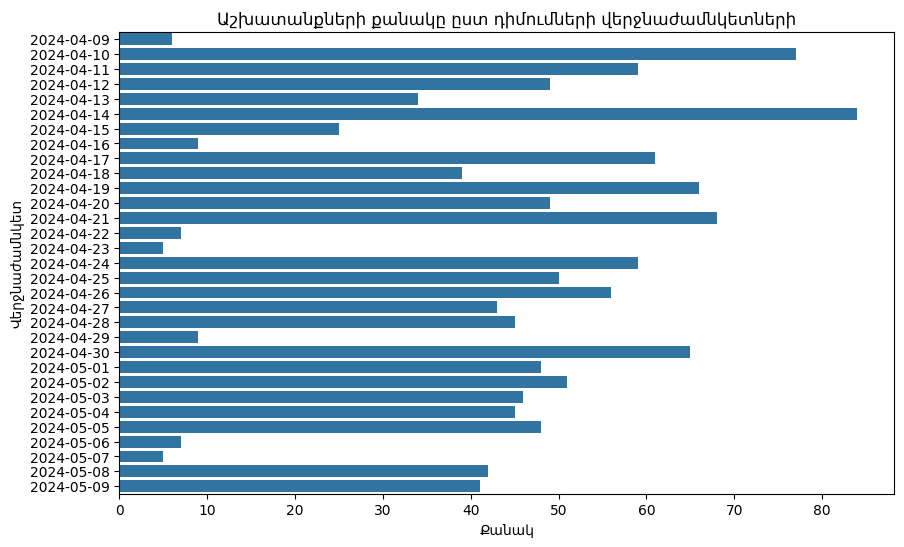

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(y='deadline', data=df.sort_values(by=['deadline']))
plt.title('Աշխատանքների քանակը ըստ դիմումների վերջնաժամնկետների')
plt.ylabel('Վերջնաժամնկետ')
plt.xlabel('Քանակ')
plt.show()

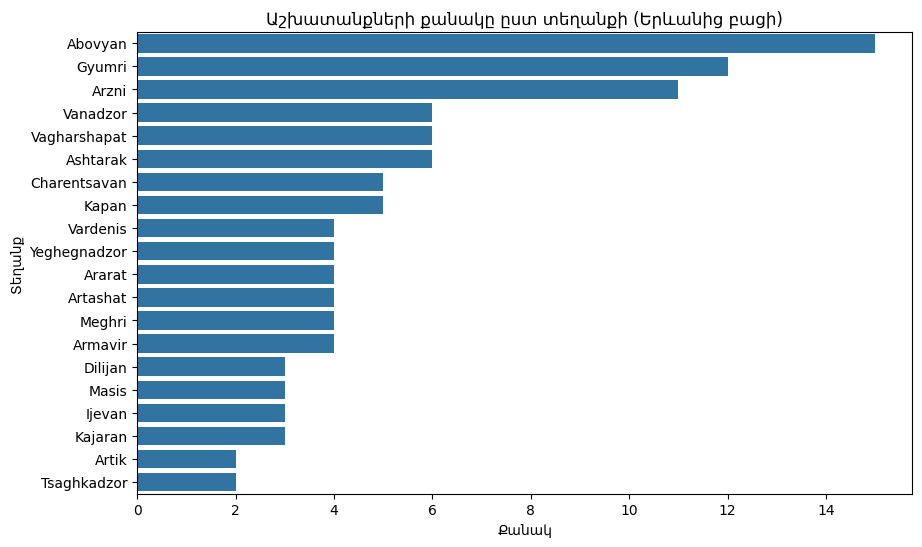

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(y='location', data=df, order=df['location'].value_counts()[2:22].index)
plt.title('Աշխատանքների քանակը ըստ տեղանքի (Երևանից բացի)')
plt.xlabel('Քանակ')
plt.ylabel('Տեղանք')
plt.show()

In [112]:
grouped_body = df.groupby('company').size().reset_index(name='count')

df_body = grouped_body[["company", "count"]]
df_body

,company,count
0,"ESTETIC CLINIC""",1
1,"Inc.""",3
2,"Loan Management Services""",3
3,"Yerevan""",2
4,"""""ALEX RETAIL COMPANY"""" LLC",1
...,...,...
473,Ֆրոզեն Միթ ՍՊԸ,1
474,“Academy Of Creative Explorers” LLC,1
475,“Digital Line” Limited Liability Company,3
476,“Impulse Business Management” LLC,3


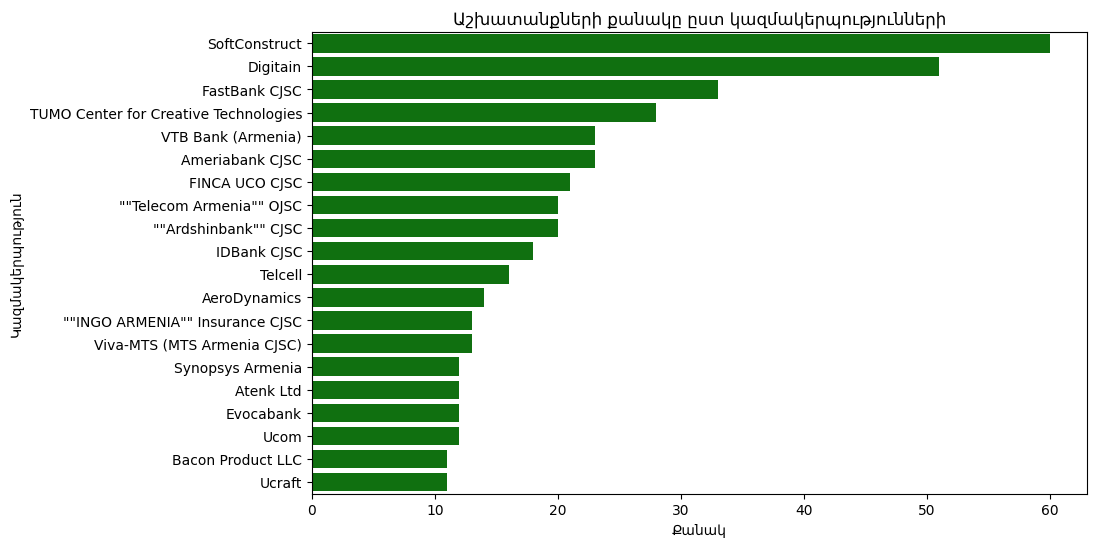

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(y='company', data=df, order=df['company'].value_counts().head(20).index, color='green')
plt.title('Աշխատանքների քանակը ըստ կազմակերպությունների')
plt.ylabel('Կազմակերպություն')
plt.xlabel('Քանակ')
plt.show()

<Axes: >

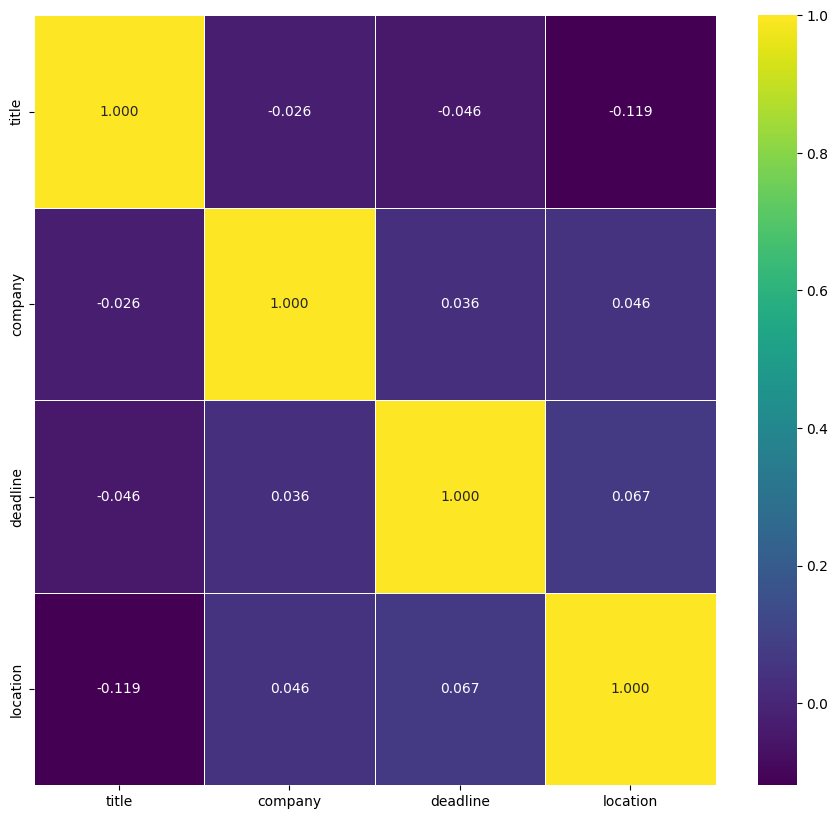

In [114]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
plt.figure(figsize=(11, 10))
label_encoder = LabelEncoder()
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns, cmap="viridis", annot=True, linewidth=.5, fmt=".3f")

# Conclusion


1) Առավելագույն վերջնաժամկետը մեկ ամիսն է

2) Ամենախոշոր գործատուներն են՝ "SoftConstruct", "Digitain", "VTB Bank (Armenia)", "TUMO Center for Creative Technologies" և "FastBank CJSC"

3) Ամենապահանջված աշխատանքներն են՝ "Հաշվապահ","Sales Manager", "Հաշվետար", "Product Manager"

4) Աշխատանքների գերիշխող մասը գտնվում է Երևանում, իսկ մնացած քաղաքներից ամենաշատ աշխատանքները կան Աբովյանում, Գյումրիում և Արզնիում։

5) Ամենամեծ կոնցենտրացիան վերջնաժամկետի և գտնվելու վայրի միջև է